# Check for Out-of Vocabulary Words

In [1]:
import gensim.downloader as api

# Dowload and load the pre-trained model
model = api.load('word2vec-google-news-300') 

In [2]:
import json

train_data = json.load(open('ATE_train.json', 'r'))
val_data = json.load(open('ATE_val.json', 'r'))
test_data = json.load(open('ATE_test.json', 'r'))

total_tokens = []
out_of_vocab = []
in_vocab = []
token_with_labels = []

for index, data in test_data.items():
    text = data['text']
    labels = data['labels']
    tokens = text.split()
    for i, token in enumerate(tokens):
        total_tokens.append(token)
        try:
            model[token]
            in_vocab.append(token)
        except:
            out_of_vocab.append(token)
            if labels[i] != 'O':
                token_with_labels.append(token)
                # print(token, labels[i])
                pass

print('Total tokens:', len(total_tokens))
print('Out of vocabulary tokens:', len(out_of_vocab))
print('In vocabulary tokens:', len(in_vocab))
print('Token with labels:', len(token_with_labels))
print('Unique tokens:', len(set(total_tokens)))
print('Unique out of vocabulary tokens:', len(set(out_of_vocab)))
print('Unique in vocabulary tokens:', len(set(in_vocab)))
print('Unique token with labels:', len(set(token_with_labels)))
print('Out of vocabulary Labelled tokens:')
print(set(token_with_labels))

Total tokens: 5171
Out of vocabulary tokens: 1090
In vocabulary tokens: 4081
Token with labels: 28
Unique tokens: 1324
Unique out of vocabulary tokens: 91
Unique in vocabulary tokens: 1233
Unique token with labels: 26
Out of vocabulary Labelled tokens:
{'dual-core', '(', 'Built-in', '4000', 'aluminium', '10.9', 'ADSl', 'interneting', '2011', 'Intel4000', 'on/off', 'TRACKPAD', 'os.x', 'surfuring', '2.9ghz', 'Set-Up', 'Boot-up', ')', '830', 'of', '3-Year', 'baterry', 'CD/DVD', 'built-in', 'Win8', '800'}


{'O': 0, 'B': 1, 'I': 2}


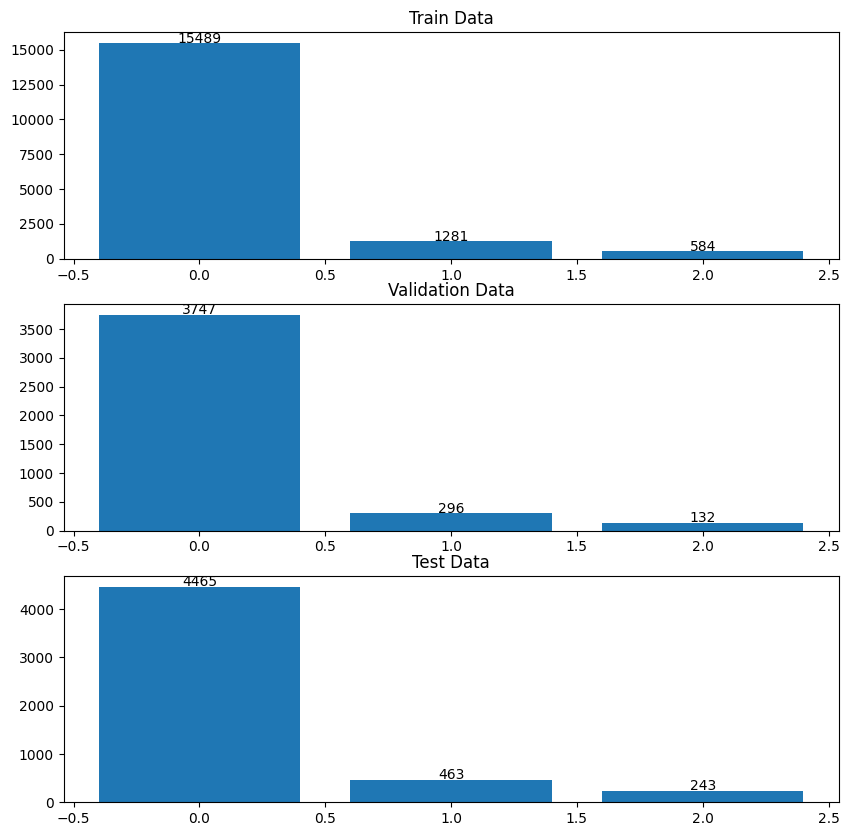

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class_to_idx = {}
for index, data in train_data.items():
    labels = data['labels']
    for label in labels:
        if label not in class_to_idx:
            class_to_idx[label] = len(class_to_idx)
print(class_to_idx)
            
all_labels_train = []
for index, data in train_data.items():
    labels = data['labels']
    all_labels_train.extend([class_to_idx[label] for label in labels])
            
all_labels_val = []
for index, data in val_data.items():
    labels = data['labels']
    all_labels_val.extend([class_to_idx[label] for label in labels])

all_labels_test = []
for index, data in test_data.items():
    labels = data['labels']
    all_labels_test.extend([class_to_idx[label] for label in labels])

unique_label_train, counts_label_train = np.unique(all_labels_train, return_counts=True)
unique_label_val, counts_label_val = np.unique(all_labels_val, return_counts=True)
unique_label_test, counts_label_test = np.unique(all_labels_test, return_counts=True)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].bar(unique_label_train, counts_label_train)
ax[0].set_title('Train Data')
for i, v in enumerate(counts_label_train):
    ax[0].text(i, v + 10, str(v), ha='center')
ax[1].bar(unique_label_val, counts_label_val)
ax[1].set_title('Validation Data')
for i, v in enumerate(counts_label_val):
    ax[1].text(i, v + 10, str(v), ha='center')
ax[2].bar(unique_label_test, counts_label_test)
ax[2].set_title('Test Data')
for i, v in enumerate(counts_label_test):
    ax[2].text(i, v + 10, str(v), ha='center')
plt.show()

# Word2Vector Embeddings

In [6]:
import gensim   
import gensim.downloader as api

model = api.load('word2vec-google-news-300') 

In [2]:
# print(list(api.info()['models'].keys()))
# print(len(model['world']), model['world'])
# print(model.most_similar('laugh', topn=5))
# print(model['wfbow'])
print(model.similarity('laugh', 'laughing'))

0.7357167


# FastText Embeddings


In [7]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

In [8]:
print(fasttext_model.similarity('laugh', 'laughing'))

0.74053586


# GloVe Embeddings

In [9]:
glove_model = api.load('glove-wiki-gigaword-300')

In [10]:
print(glove_model.similarity('laugh', 'laughing'))

0.65835667
